In [1]:
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

### Example 

* Suppose we have two samples that represent Biki ride durations for two distinct neighborhoods `a` and `b`

* Instead of working with actual data, sample the data for the two neighborhoods from a gaussian with a mean ($\mu=20$) the a standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    * In our scenario, this amounts to measuring the duration of 30 bike rides

In [2]:
# Write your code here 
np.random.seed(0)
region_a = np.random.normal(20, 4, 15)
region_b = np.random.normal(20, 4, 15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [3]:
a_mean = np.mean(region_a)
b_mean = np.mean(region_b)
difference_mean = abs(a_mean - b_mean)
difference_mean

1.953214960453245

The observed difference between the means is 1.9, I do not believe there is a statistically significant difference between the samples.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

Text(0, 0.5, 'Density')

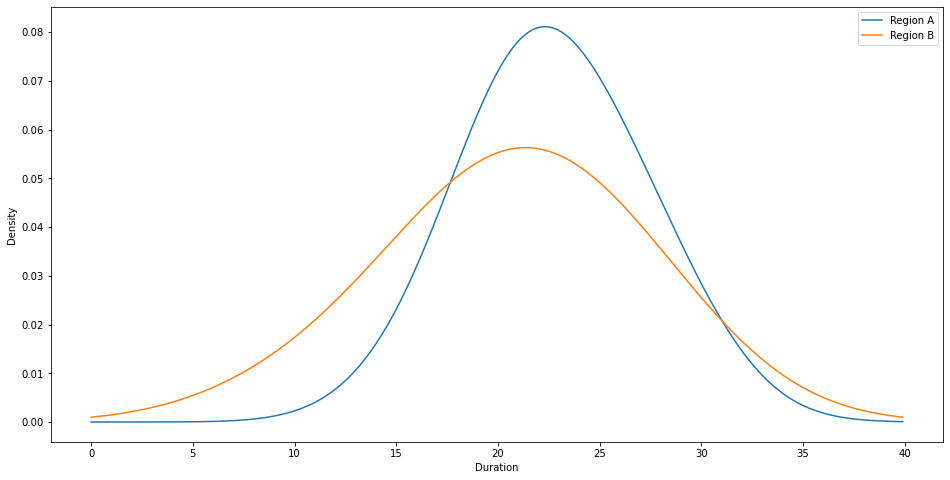

In [7]:
# Write your code here 
x = np.arange(0, 40, 0.1)

kde_1 = sp.stats.gaussian_kde(region_a, bw_method=1)
kde_2 = sp.stats.gaussian_kde(region_b, bw_method=1)

x_densities_1 = kde_1.evaluate(x)
x_densities_2 = kde_2.evaluate(x)

plt.figure(figsize=(16,8))

plt.plot(x, x_densities_1, label="Region A")
plt.plot(x, x_densities_2, label="Region B")

plt.legend()
plt.xlabel('Duration')
plt.ylabel('Density')

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Yes, their means are close but region A is more narrow than region B.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [18]:
diff_arr = []
data_concat = np.random.normal(20, 4, 30)

for _ in np.arange(1000):
    np.random.shuffle(data_concat)
    shuffled_a = data_concat[0:15]
    shuffled_b = data_concat[15:30]
    mean_diff = np.mean(shuffled_a) - np.mean(shuffled_b)
    diff_arr.append(mean_diff)

p_val = sum(diff_arr >= a_mean - b_mean) / len(diff_arr) 
p_val

0.081

There is no statistical significance since the p value is 0.081 and for it to be significant it needs to be < 0.05.

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

Text(0, 0.5, 'Probablility')

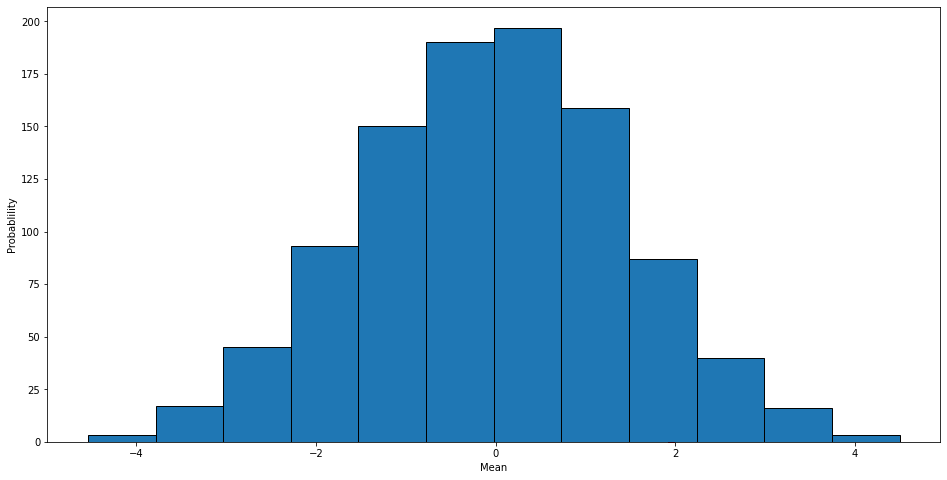

In [24]:
# Write your code here
plt.figure(figsize=(16,8))

plt.hist(diff_arr, bins=12, edgecolor='black')
plt.scatter(np.mean(region_a) - np.mean(region_b), 0, color='red')
plt.xlabel('Mean')
plt.ylabel('Probablility')